#üìå Extracci√≥n

In [1]:
import pandas as pd
df = pd.read_json("/content/TelecomX_Data.json")
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [2]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


#**üîß Transformaci√≥n**

 1. Normalizaci√≥n (aplanado) de columnas anidadas

In [3]:
# Importar librer√≠as
import pandas as pd

# Asumimos que ya tienes el DataFrame llamado 'df'
customer_df = df['customer'].apply(pd.Series)
phone_df = df['phone'].apply(pd.Series)
internet_df = df['internet'].apply(pd.Series)
account_df = df['account'].apply(pd.Series)

# Combinar todo en un nuevo DataFrame
data = pd.concat([
    df[['customerID', 'Churn']],
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)


In [4]:
# Extraer valores si 'Charges' es un diccionario
account_df['MonthlyCharges'] = account_df['Charges'].apply(
    lambda x: x.get('Monthly') if isinstance(x, dict) else None
)

account_df['TotalCharges'] = account_df['Charges'].apply(
    lambda x: x.get('Total') if isinstance(x, dict) else None
)

# Convertir a tipo num√©rico
account_df['TotalCharges'] = pd.to_numeric(account_df['TotalCharges'], errors='coerce')

In [5]:
# Concatenar columnas individuales planas con columnas principales
df_flat = pd.concat([
    df[['customerID', 'Churn']],
    customer_df, phone_df, internet_df, account_df
], axis=1)

# Asegurar que las columnas de inter√©s sean num√©ricas
df_flat['MonthlyCharges'] = pd.to_numeric(df_flat['MonthlyCharges'], errors='coerce')
df_flat['TotalCharges'] = pd.to_numeric(df_flat['TotalCharges'], errors='coerce')

# Exploraci√≥n b√°sica de cargos
print(df_flat[['MonthlyCharges', 'TotalCharges']].describe())

# Conteo de valores de churn
print(df_flat['Churn'].value_counts())

# Identificaci√≥n de columnas categ√≥ricas tipo texto
cat_cols = df_flat.select_dtypes(include='object').columns.tolist()
print("Columnas categ√≥ricas (tipo object):", cat_cols)

# Codificaci√≥n one-hot de columnas seleccionadas
df_encoded = pd.get_dummies(df_flat, columns=[
    'InternetService', 'Contract', 'PaymentMethod', 'gender', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling'
], drop_first=True)

# An√°lisis de distribuci√≥n del churn por tipo de contrato
print(df_flat.groupby('Contract')['Churn'].value_counts(normalize=True).unstack())

       MonthlyCharges  TotalCharges
count     7267.000000   7256.000000
mean        64.720098   2280.634213
std         30.129572   2268.632997
min         18.250000     18.800000
25%         35.425000    400.225000
50%         70.300000   1391.000000
75%         89.875000   3785.300000
max        118.750000   8684.800000
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Columnas categ√≥ricas (tipo object): ['customerID', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges']
Churn                           No       Yes
Contract                                    
Month-to-month  0.032459  0.554307  0.413233
One year        0.030283  0.860434  0.109282
Two year        0.027539  0.944923  0.027539


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [7]:
df_flat = pd.concat([
    df[['customerID', 'Churn']],
    customer_df, phone_df, internet_df, account_df
], axis=1)

In [8]:
print(df_flat[['MonthlyCharges', 'TotalCharges']].describe())
print(df_flat['Churn'].value_counts())

       MonthlyCharges  TotalCharges
count     7267.000000   7256.000000
mean        64.720098   2280.634213
std         30.129572   2268.632997
min         18.250000     18.800000
25%         35.425000    400.225000
50%         70.300000   1391.000000
75%         89.875000   3785.300000
max        118.750000   8684.800000
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [9]:
cat_cols = df_flat.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['customerID', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges']


In [10]:
data.describe()

SeniorCitizen       tenure
count    7267.000000  7267.000000
mean        0.162653    32.346498
std         0.369074    24.571773
min         0.000000     0.000000
25%         0.000000     9.000000
50%         0.000000    29.000000
75%         0.000000    55.000000
max         1.000000    72.000000

2. Limpieza de columnas num√©ricas

In [11]:
# Reemplaza espacios vac√≠os por NaN y convierte a float
df_flat['TotalCharges'] = pd.to_numeric(df_flat['TotalCharges'], errors='coerce')
df_flat['MonthlyCharges'] = pd.to_numeric(df_flat['MonthlyCharges'], errors='coerce')

# Estimar cargos diarios
df_flat['daily_charges_estimate'] = df_flat['MonthlyCharges'] / 30

In [12]:
print(data.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges']


#üìä Carga y an√°lisis

#Graficas

**Distribuci√≥n General del Churn**

/tmp/ipython-input-13-1902337674.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_flat, x='Churn', palette='Set2')


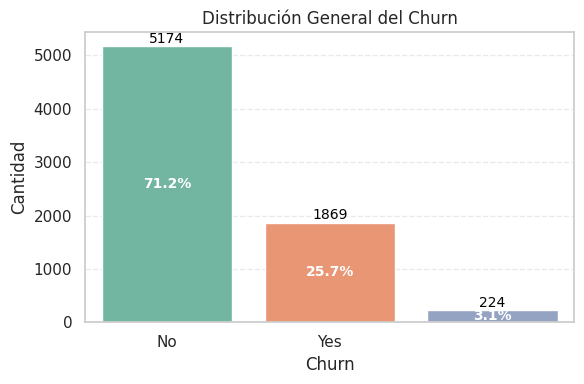

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style='whitegrid')

# Crear gr√°fico
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_flat, x='Churn', palette='Set2')

# Total de registros
total = len(df_flat)

# A√±adir etiquetas
for bar in ax.patches:
    count = int(bar.get_height())
    percent = 100 * count / total

    # Etiqueta de porcentaje dentro de la barra
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        count / 2,  # Mitad de la barra
        f'{percent:.1f}%',
        ha='center', va='center',
        color='white', fontsize=10, fontweight='bold'
    )

    # Conteo absoluto fuera de la barra
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        count + 5,  # Un poco por encima de la barra
        f'{count}',
        ha='center', va='bottom',
        color='black', fontsize=10
    )

# T√≠tulos
plt.title("Distribuci√≥n General del Churn")
plt.xlabel("Churn")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

**Observaciones Clave:**

El gr√°fico muestra la distribuci√≥n total de los clientes que han cancelado (Churn = Yes) frente a aquellos que permanecen en la empresa (Churn = No). Se observa que:

La mayor√≠a de los clientes no han cancelado el servicio, lo cual es un indicador positivo para la empresa.

Sin embargo, un porcentaje significativo ha cancelado, lo que evidencia una problem√°tica de retenci√≥n de clientes.

En valores absolutos y relativos:

Se indica el n√∫mero exacto de clientes en cada grupo sobre cada barra.

El porcentaje dentro de cada barra facilita una lectura r√°pida del impacto relativo.

**Distribuci√≥n de Churn (Cancelaciones)**

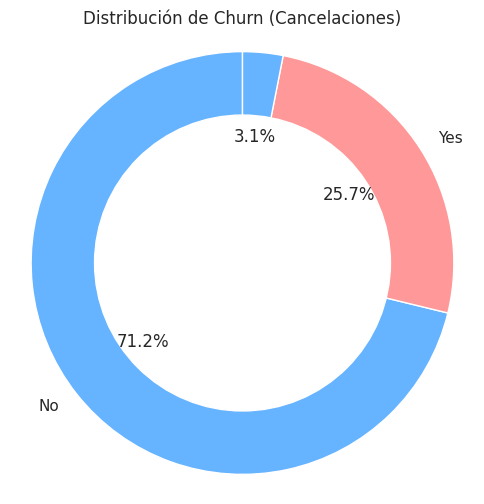

In [14]:
# Conteo de valores
churn_counts = data['Churn'].value_counts()

# Colores personalizados (opcional)
colors = ['#66b3ff', '#ff9999']  # azul para No, rojo para Yes

# Crear gr√°fico de torta
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

# Agregar c√≠rculo blanco en el centro (para hacer "anillo")
centro = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centro)

plt.title('Distribuci√≥n de Churn (Cancelaciones)')
plt.axis('equal')
plt.show()

#### üîπ Resultados observados:
- üü¶ **71.2%** de los clientes **no han cancelado** (Churn = No).
- üü• **25.7%** de los clientes **s√≠ han cancelado** (Churn = Yes).
- ‚ö™ **3.1%** restante podr√≠a deberse a registros con valores nulos o mal etiquetados.

---

####  Observaciones clave:

- **Tasa de cancelaci√≥n moderadamente alta (25.7%)**  
  M√°s de **1 de cada 4 clientes cancela** el servicio. Esto representa un desaf√≠o importante en t√©rminos de retenci√≥n y costos de adquisici√≥n.

- **Mayor√≠a de clientes activos (71.2%)**  
  Aunque la mayor√≠a permanece, la fracci√≥n de abandono sigue siendo relevante.

- **El 3.1% adicional** sugiere que podr√≠a haber **valores faltantes o errores en la codificaci√≥n de la columna `Churn`**, y se recomienda revisar esos registros.

** Conclusi√≥n estrat√©gica:**

> Aunque la mayor√≠a de los clientes se mantiene activa, el **25.7% de churn representa un riesgo relevante** para la sostenibilidad del negocio. Es fundamental identificar los factores que contribuyen a esta p√©rdida para aplicar estrategias efectivas de fidelizaci√≥n. Adem√°s, se sugiere revisar la calidad de los datos para aclarar el 3.1% no categorizado.

---

**Cantidad de servicios activos por estado de Churn**

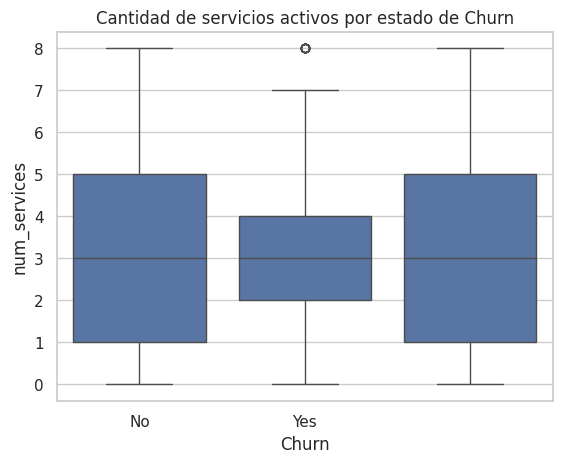

In [15]:
# N√∫mero de servicios contratados
data['num_services'] = data[[
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]].apply(lambda x: sum(val == 'Yes' for val in x), axis=1)

sns.boxplot(data=data, x='Churn', y='num_services')
plt.title('Cantidad de servicios activos por estado de Churn')
plt.show()

**Observaciones clave**

Mediana similar (~3 servicios) en ambos grupos

La l√≠nea horizontal dentro de cada caja representa la mediana.

Ambos grupos tienen una mediana de aproximadamente 3 servicios activos.

Clientes que se quedan (No) tienden a tener m√°s servicios

El grupo "No" tiene una distribuci√≥n m√°s amplia hacia valores altos (hasta 8).

El tercer cuartil (75%) de los que se quedan est√° por encima de 4 servicios, mientras que en los que cancelan est√° cerca de 4 o por debajo.

Menor dispersi√≥n entre quienes cancelan (Yes)

La caja del grupo "Yes" es m√°s compacta, lo que indica menor variabilidad en la cantidad de servicios entre esos clientes.

Clientes con menos servicios tambi√©n cancelan

Hay un n√∫mero importante de clientes con 0 a 2 servicios activos en ambos grupos, lo que puede reflejar planes b√°sicos y poco compromiso.

***Conclusi√≥n: ***

Los clientes que permanecen activos (No Cancelan), tienden a tener una mayor cantidad de servicios contratados, mientras que aquellos que cancelan (Yes),    suelen tener menos servicios. Se puede intuir que ofrecer paquetes combinados o promover el uso de m√°s servicios podr√≠a ser una estrategia efectiva para reducir la cancelaci√≥n.**

**M√©todo de Pago y su relaci√≥n Churn**

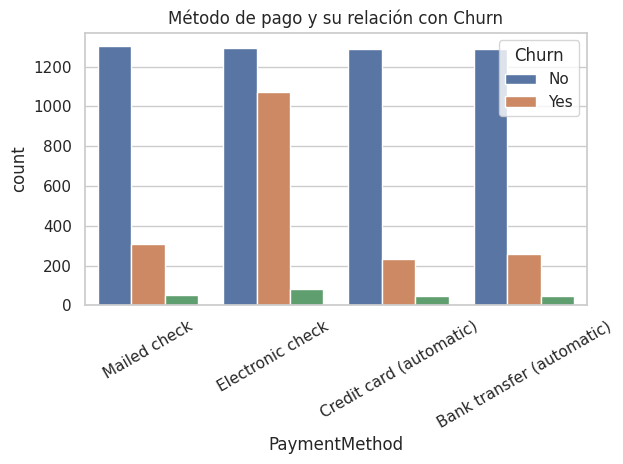

In [16]:
sns.countplot(data=data, x='PaymentMethod', hue='Churn')
plt.title('M√©todo de pago y su relaci√≥n con Churn')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Observaciones Clave:**

Electronic Check = Alto churn

Pagos autom√°ticos = Mayor retenci√≥n

Mailed Check = Retenci√≥n moderada

**Conclusi√≥n:**

Los clientes que pagan mediante m√©todos autom√°ticos (como tarjeta o transferencia) tienden a permanecer m√°s tiempo con la empresa. Por el contrario, los que pagan con cheque electr√≥nico muestran una tasa de cancelaci√≥n mucho m√°s alta. Fomentar el uso de pagos autom√°ticos puede ser una estrategia efectiva para reducir el churn.

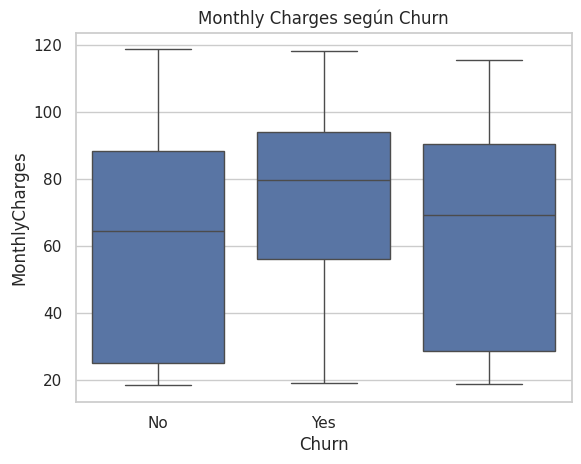

In [43]:
sns.boxplot(data=df_flat, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges seg√∫n Churn")
plt.show()




**MonthlyCharges seg√∫n Churn**

El gr√°fico de cajas compara la distribuci√≥n de los cargos mensuales (MonthlyCharges) entre los clientes que cancelaron el servicio (Churn = Yes) y los que no (Churn = No). A partir de la visualizaci√≥n se observa lo siguiente:

Los clientes que cancelaron el servicio tienden a tener cargos mensuales m√°s altos. Su mediana est√° por encima de la de los clientes que no cancelaron.
La distribuci√≥n de los que no cancelaron muestra una mayor dispersi√≥n, incluyendo una mayor presencia de clientes con cargos bajos (por debajo de $30).
Los cuartiles superiores (75%) de los clientes con churn est√°n m√°s elevados, lo que sugiere que los altos cargos mensuales pueden estar asociados a una mayor probabilidad de cancelaci√≥n.
Conclusi√≥n:

**Conclusi√≥n:**

Existe una relaci√≥n entre el monto de los cargos mensuales y el abandono del servicio, lo que puede ser √∫til para estrategias de retenci√≥n (por ejemplo, ofrecer descuentos a clientes con cargos altos).

**Total Charges seg√∫n Churn**

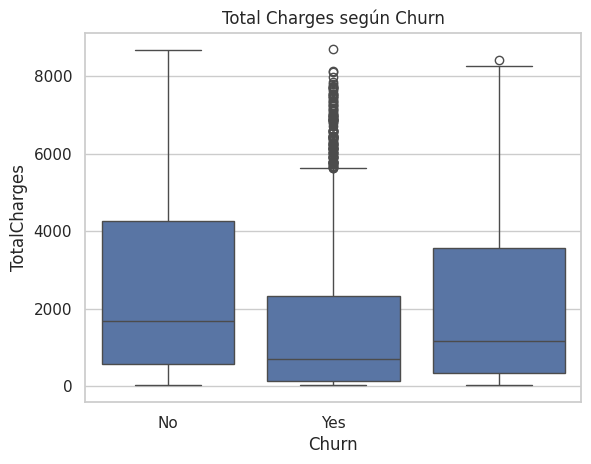

In [44]:
sns.boxplot(data=df_flat, x='Churn', y='TotalCharges')
plt.title("Total Charges seg√∫n Churn")
plt.show()

**TotalCharges seg√∫n Churn**

Este gr√°fico muestra la comparaci√≥n de los **cargos totales** (`TotalCharges`) acumulados por los clientes seg√∫n su estado de cancelaci√≥n (`Churn`).

** Observaciones Clave:**

- Los clientes que **no cancelaron** (`Churn = No`) tienen una mediana de cargos totales significativamente **m√°s alta** que los que s√≠ cancelaron.
- La mayor√≠a de los clientes que **cancelaron** tienen cargos totales bajos, lo que sugiere que dejaron el servicio en una etapa **temprana** del ciclo de vida como cliente.
- Se observa una **alta dispersi√≥n** en ambas categor√≠as, pero con una mayor concentraci√≥n de **valores at√≠picos (outliers)** en el grupo que cancel√≥.
- Clientes con cargos bajos (debido a menor tiempo en la compa√±√≠a) parecen ser m√°s propensos a cancelar.

**Conclusi√≥n:**

Los usuarios con menor tiempo de permanencia y cargos acumulados bajos tienden a cancelar m√°s, lo que resalta la importancia de estrategias de fidelizaci√≥n **durante las primeras etapas** del ciclo del cliente.

**Distribuci√≥n General del** ***Churn***

Distribuci√≥n por Gender

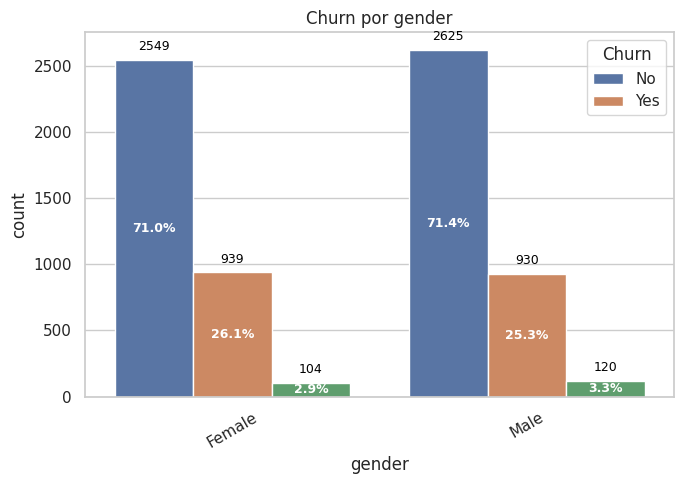

In [19]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['gender']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

Observaciones Claves:
`gender` (G√©nero)

- Las tasas de cancelaci√≥n son pr√°cticamente **iguales** entre hombres y mujeres.
  - `Female`: ~26% churn.
  - `Male`: ~25% churn.

***Conclusi√≥n:***

> El g√©nero **no tiene un impacto significativo** en la cancelaci√≥n del servicio. No se recomienda utilizar esta variable como criterio principal para campa√±as de retenci√≥n.

**Distribuci√≥n Partner**

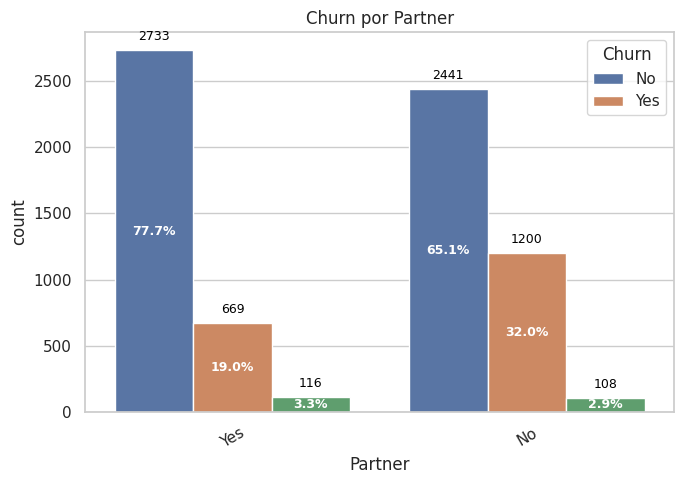

In [20]:


# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['Partner']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

Partner` (¬øTiene pareja?)

- **Clientes sin pareja** (`Partner = No`):
  - Mayor proporci√≥n de churn (~32%).
- **Clientes con pareja** (`Partner = Yes`):
  - Menor churn (~19%).

**Observaciones Clave:**

Partner` (¬øTiene pareja?)

- **Clientes sin pareja** (`Partner = No`):
  - Mayor proporci√≥n de churn (~32%).
- **Clientes con pareja** (`Partner = Yes`):
  - Menor churn (~19%).

**Conclusi√≥n:**

Tener pareja parece estar relacionado con una mayor fidelidad al servicio. Esto sugiere que clientes con pareja podr√≠an estar compartiendo el servicio, tener mayor estabilidad o considerar m√°s costosa la cancelaci√≥n.




Distribuci√≥n Dependents

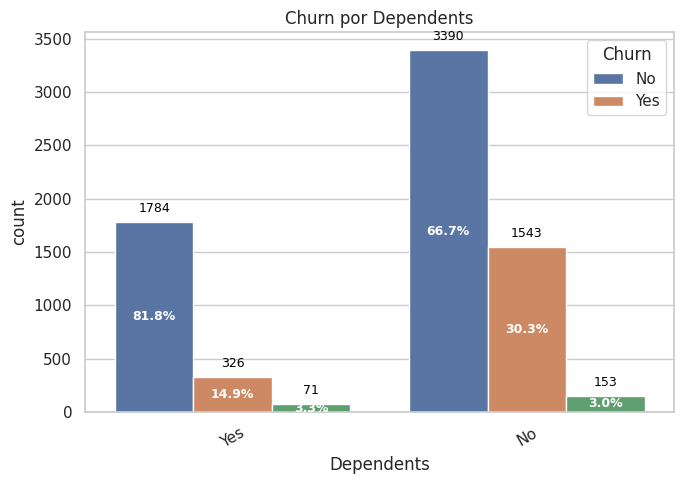

In [21]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['Dependents']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**


Clientes sin dependientes (`Dependents = No`)**:
  - Tienen una tasa de cancelaci√≥n de **30%**.
  - Solo el **67%** permanece activo.

- **Clientes con dependientes (`Dependents = Yes`)**:
  - Tienen una tasa de cancelaci√≥n m√°s baja, de **15%**.
  - Un **82%** permanece activo.

*** Conclusi√≥n estrat√©gica***

- `Dependents` es una variable √∫til para segmentaci√≥n.
- Clientes con dependientes podr√≠an responder mejor a estrategias de fidelizaci√≥n orientadas al hogar o familia.
- Clientes **sin dependientes presentan el doble de riesgo de churn**, lo cual los convierte en un grupo clave para monitorear o intervenir.

**Distribuci√≥n por PhoneService**

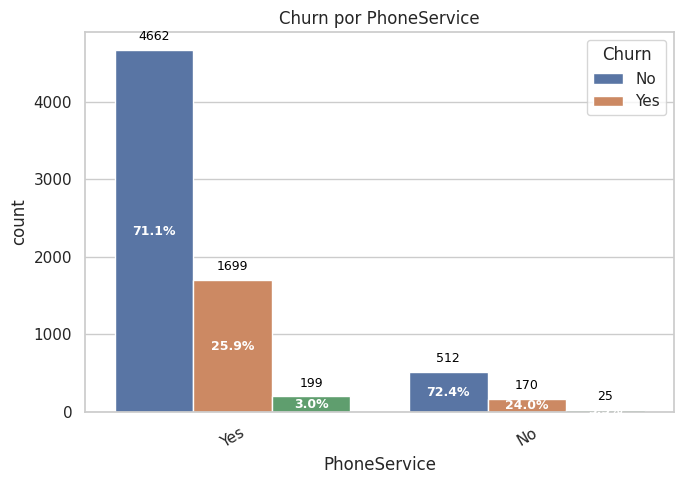

In [22]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['PhoneService']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin servicio telef√≥nico (`PhoneService = No`)**:
  - Tienen una tasa de churn del **24%**.
  - El **72%** permanece con la compa√±√≠a.

- **Clientes con servicio telef√≥nico (`PhoneService = Yes`)**:
  - Tienen una tasa de churn levemente superior, del **26%**.
  - El **71%** permanece activo.

**Conclusi√≥n:**

- La variable `PhoneService` **no muestra una relaci√≥n fuerte con la cancelaci√≥n**.
- Es poco probable que estrategias basadas √∫nicamente en este servicio tengan impacto relevante en la fidelizaci√≥n.
- Puede descartarse como variable clave en an√°lisis predictivos o priorizarse menos en campa√±as de retenci√≥n.


Distribuci√≥n por MultipleLines

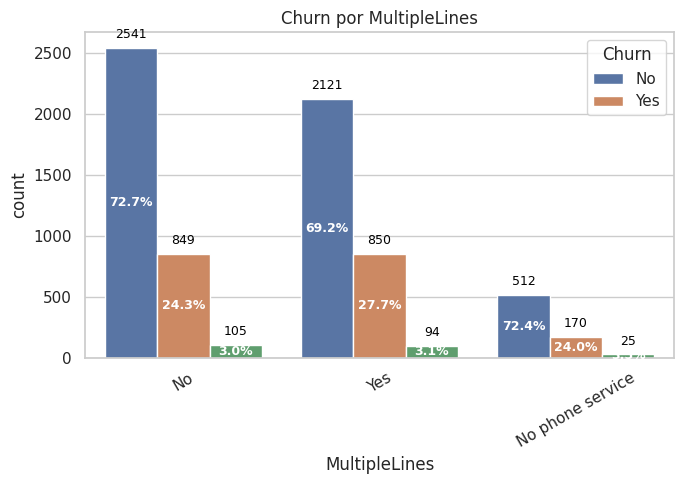

In [23]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['MultipleLines']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin m√∫ltiples l√≠neas (`MultipleLines = No`)**:
  - Tasa de churn: **24%**
  - Permanencia: **73%**

- **Clientes sin servicio telef√≥nico (`MultipleLines = No phone service`)**:
  - Tasa de churn: **24%**
  - Permanencia: **72%**

- **Clientes con m√∫ltiples l√≠neas (`MultipleLines = Yes`)**:
  - Tasa de churn: **28%**
  - Permanencia: **69%**

**Conclusi√≥n**

- La variable `MultipleLines` tiene **una influencia leve en el churn**.
- La **mayor tasa de cancelaci√≥n entre quienes tienen m√∫ltiples l√≠neas** puede estar relacionada con clientes m√°s exigentes o con servicios m√°s costosos.
- Aunque no es una variable fuertemente predictiva por s√≠ sola, **podr√≠a aportar valor combinada con otras variables** como `Contract` o `MonthlyCharges`.


Distribuci√≥n por InternetService

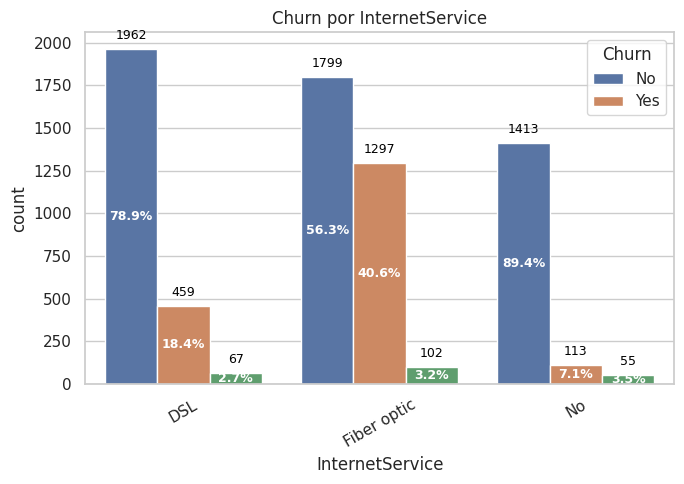

In [24]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['InternetService']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes con servicio DSL (`InternetService = DSL`)**:
  - Churn: **18%**
  - Permanencia: **79%**

- **Clientes con fibra √≥ptica (`InternetService = Fiber optic`)**:
  - Churn: **41%**
  - Permanencia: **56%**

- **Clientes sin servicio de internet (`InternetService = No`)**:
  - Churn: **7%**
  - Permanencia: **89%**

**Observaciones Clave:**

- **Clientes con servicio DSL (`InternetService = DSL`)**:
  - Churn: **18%**
  - Permanencia: **79%**

- **Clientes con fibra √≥ptica (`InternetService = Fiber optic`)**:
  - Churn: **41%**
  - Permanencia: **56%**

- **Clientes sin servicio de internet (`InternetService = No`)**:
  - Churn: **7%**
  - Permanencia: **89%**

Distribuci√≥n por OnlineSecurity

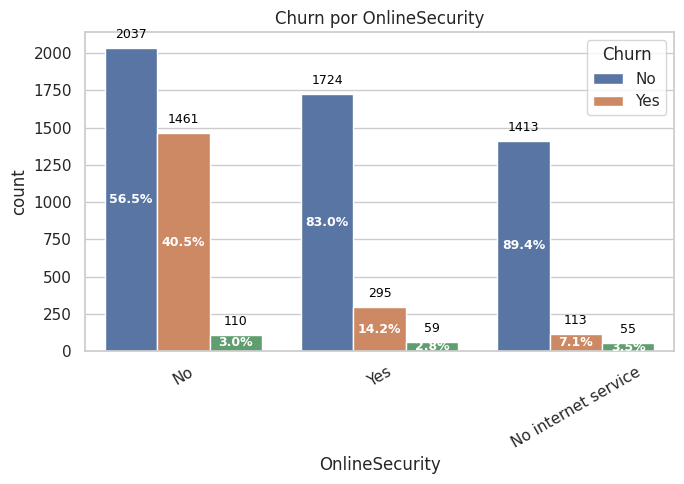

In [25]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['OnlineSecurity']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin seguridad en l√≠nea (`OnlineSecurity = No`)**:
  - Churn: **41%**
  - Permanencia: **56%**

- **Clientes con seguridad en l√≠nea (`OnlineSecurity = Yes`)**:
  - Churn: **14%**
  - Permanencia: **83%**

- **Clientes sin servicio de internet (`OnlineSecurity = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**

**Conclusi√≥n**

- `OnlineSecurity` es una variable **predictiva de retenci√≥n**.
- La ausencia del servicio est√° asociada a mayor riesgo de churn.
- Recomendaci√≥n: **incentivar o incluir servicios de seguridad en l√≠nea** como parte de la oferta, especialmente para clientes de alto valor o nuevos usuarios, ya que esto puede **ayudar a disminuir cancelaciones**.

**Distribuci√≥n por OnlineBackup**

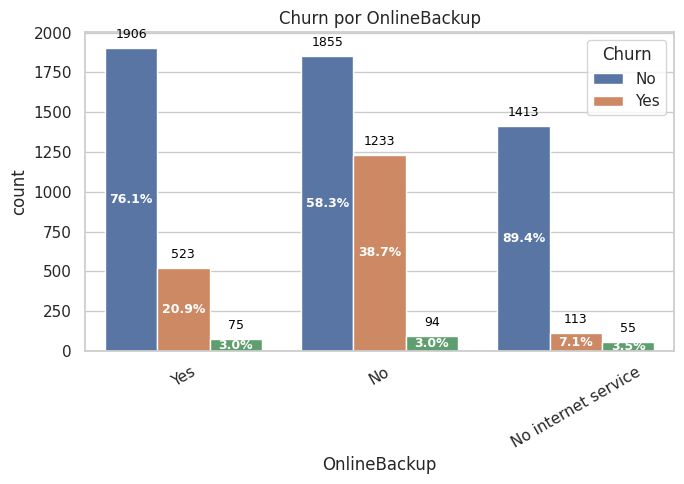

In [26]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['OnlineBackup']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin copia de seguridad en l√≠nea (`OnlineBackup = No`)**:
  - Churn: **39%**
  - Permanencia: **58%**

- **Clientes con copia de seguridad en l√≠nea (`OnlineBackup = Yes`)**:
  - Churn: **21%**
  - Permanencia: **76%**

- **Clientes sin servicio de internet (`OnlineBackup = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**

**Conclusi√≥n**

- `OnlineBackup` es una variable **√∫til para predecir cancelaciones**.
- Su ausencia se asocia con mayor churn.
- Recomendaci√≥n: se pueden crear **campa√±as de activaci√≥n o promociones que incluyan backup en l√≠nea**, especialmente enfocadas en clientes con riesgo de cancelaci√≥n, para **aumentar el engagement y reducir churn**.

**Distribuci√≥n por DeviceProtection**

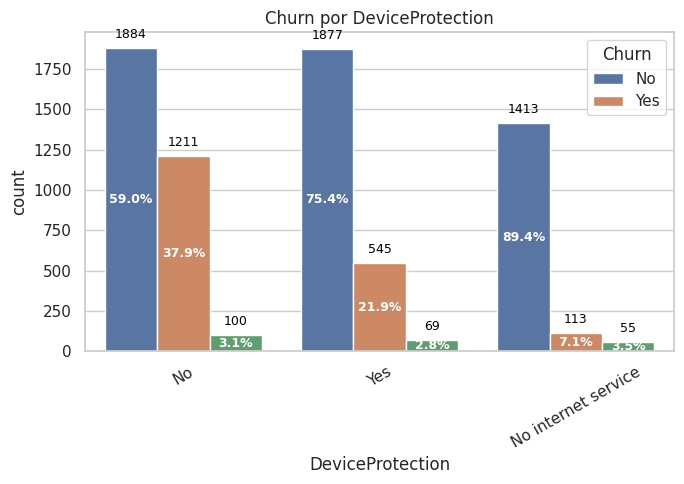

In [27]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['DeviceProtection']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin protecci√≥n de dispositivos (`DeviceProtection = No`)**:
  - Churn: **38%**
  - Permanencia: **59%**

- **Clientes con protecci√≥n de dispositivos (`DeviceProtection = Yes`)**:
  - Churn: **22%**
  - Permanencia: **75%**

- **Clientes sin internet (`DeviceProtection = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**

**Conclusi√≥n**

- `DeviceProtection` es una **variable relevante para entender el comportamiento de cancelaci√≥n**.
- Su presencia se asocia con **mayor fidelizaci√≥n**.
- Se recomienda impulsar este tipo de servicios como parte de una **estrategia de retenci√≥n**, especialmente para clientes nuevos o en riesgo.

Distribuci√≥n por TechSupport

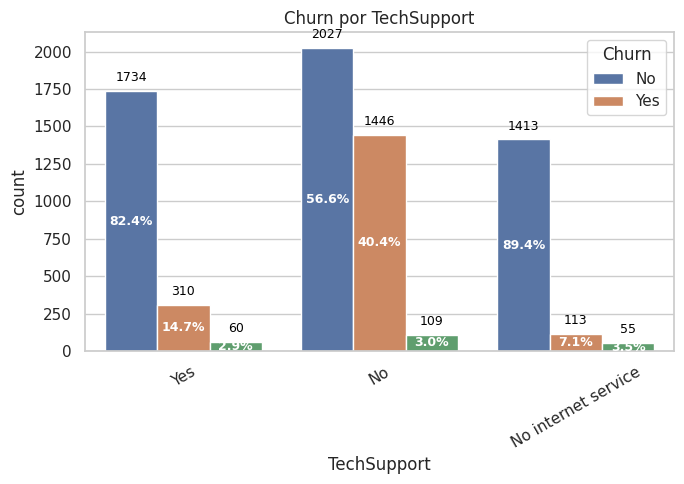

In [28]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['TechSupport']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin soporte t√©cnico (`TechSupport = No`)**:
  - Churn: **40%**
  - Permanencia: **57%**

- **Clientes con soporte t√©cnico (`TechSupport = Yes`)**:
  - Churn: **15%**
  - Permanencia: **82%**

- **Clientes sin servicio de internet (`TechSupport = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**


**Conclusi√≥n**

- `TechSupport` es una de las **variables m√°s relevantes para predecir cancelaciones**.
- Incluir o reforzar el soporte t√©cnico puede ser clave para **reducir el churn**.
- Se recomienda implementar estrategias que promuevan el uso de este servicio, como:
  - Bonificaciones por activarlo.
  - Comunicaci√≥n clara del valor del soporte t√©cnico.
  - Seguimiento proactivo a quienes lo tienen desactivado.

Distribuci√≥n por StreamingTV

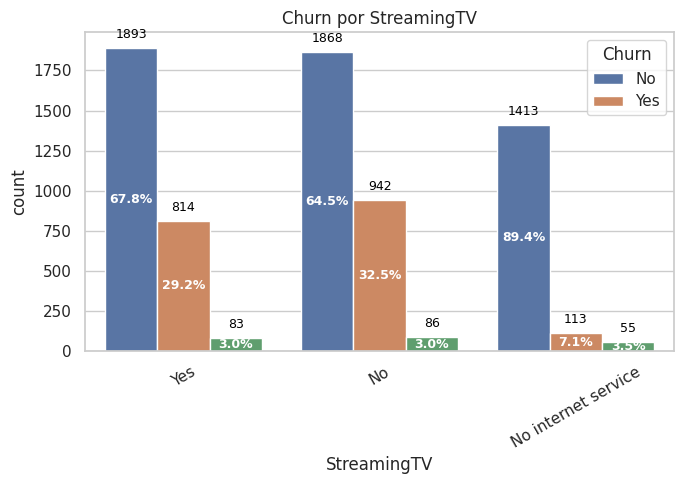

In [29]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['StreamingTV']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

Observaciones Clave:

- **Clientes sin servicio de StreamingTV (`StreamingTV = No`)**:
  - Churn: **33%**
  - Permanencia: **65%**

- **Clientes con servicio de StreamingTV (`StreamingTV = Yes`)**:
  - Churn: **29%**
  - Permanencia: **68%**

- **Clientes sin internet (`StreamingTV = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**


 **Conclusi√≥n **

- `StreamingTV` **no parece ser un factor determinante** del churn.
- Puede tener **ligera relaci√≥n con la permanencia**, posiblemente por ser un servicio adicional que aumenta el valor percibido.
- Recomendaci√≥n: considerar su inclusi√≥n dentro de paquetes promocionales, pero **priorizar servicios m√°s asociados a la retenci√≥n** como soporte t√©cnico o seguridad en l√≠nea.

Distribuci√≥n por StreamingMovies

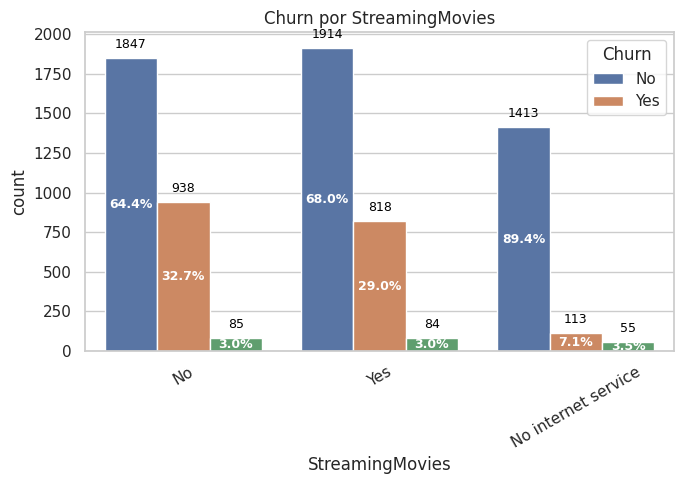

In [30]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['StreamingMovies']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes sin servicio de StreamingMovies (`StreamingMovies = No`)**:
  - Churn: **33%**
  - Permanencia: **64%**

- **Clientes con servicio de StreamingMovies (`StreamingMovies = Yes`)**:
  - Churn: **29%**
  - Permanencia: **68%**

- **Clientes sin internet (`StreamingMovies = No internet service`)**:
  - Churn: **7%**
  - Permanencia: **89%**

**Conclusi√≥n**

- `StreamingMovies` presenta una **baja influencia en la decisi√≥n de cancelar**.
- Su efecto podr√≠a ser indirecto y depender de otros factores como el tipo de contrato o los cargos mensuales.
- Puede considerarse **un servicio complementario**, m√°s √∫til para **aumentar valor percibido** que para reducir cancelaciones de forma directa.

**Conclusi√≥n**

- `Contract` es una variable **cr√≠tica para predecir y prevenir cancelaciones**.
- Los contratos a largo plazo generan **mayor estabilidad y compromiso** por parte del cliente.
- Recomendaciones:
  - Ofrecer incentivos atractivos para que los usuarios pasen de contratos mensuales a anuales o bianuales.
  - Dise√±ar campa√±as espec√≠ficas para **retener a los clientes de contrato mes a mes**, ya que representan el segmento m√°s propenso a cancelar.

Distribuci√≥n por Contract

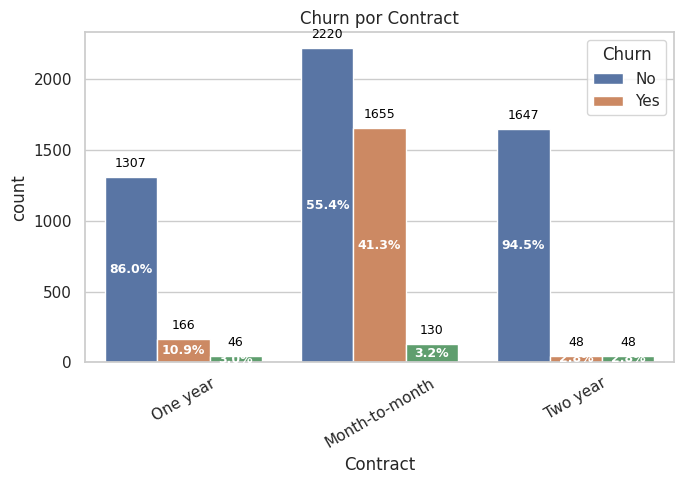

In [31]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['Contract']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Contrato mes a mes (`Month-to-month`)**:
  - Churn: **41%**
  - Permanencia: **55%**

- **Contrato a un a√±o (`One year`)**:
  - Churn: **11%**
  - Permanencia: **86%**

- **Contrato a dos a√±os (`Two year`)**:
  - Churn: **3%**
  - Permanencia: **94%**

***Conclusi√≥n ***

- `Contract` es una variable **cr√≠tica para predecir y prevenir cancelaciones**.
- Los contratos a largo plazo generan **mayor estabilidad y compromiso** por parte del cliente.
- Recomendaciones:
  - Ofrecer incentivos atractivos para que los usuarios pasen de contratos mensuales a anuales o bianuales.
  - Dise√±ar campa√±as espec√≠ficas para **retener a los clientes de contrato mes a mes**, ya que representan el segmento m√°s propenso a cancelar.

Distribuci√≥n por PaperlessBilling

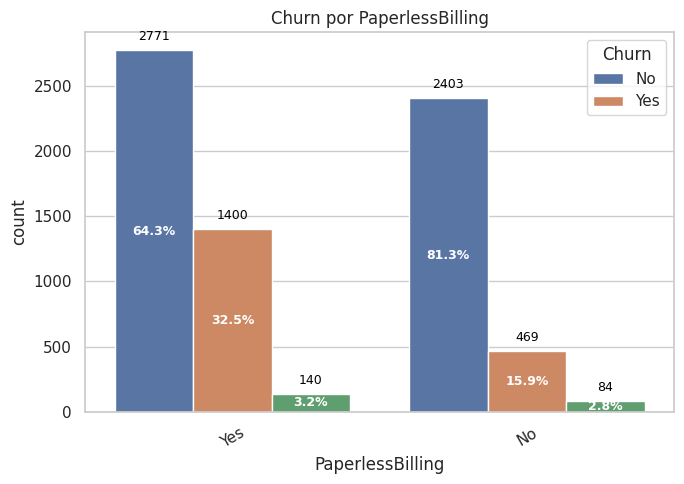

In [32]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['PaperlessBilling']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Clientes con facturaci√≥n en papel (`PaperlessBilling = No`)**:
  - Churn: **16%**
  - Permanencia: **81%**

- **Clientes con facturaci√≥n electr√≥nica (`PaperlessBilling = Yes`)**:
  - Churn: **33%**
  - Permanencia: **64%**

**Conclusi√≥n**

- `PaperlessBilling` tiene una asociaci√≥n **moderada con el churn**.
- Puede actuar como una **variable indicadora del tipo de cliente** (m√°s digitalizado y con mayor autonom√≠a).
- Se recomienda:
  - Combinar esta variable con otras (como tipo de contrato o servicios activos) para **identificar clientes de riesgo**.
  - Dise√±ar **estrategias de retenci√≥n personalizadas** para usuarios con facturaci√≥n electr√≥nica (p. ej., mayor contacto preventivo o programas de fidelizaci√≥n).

Distribuci√≥n por PaymentMethod

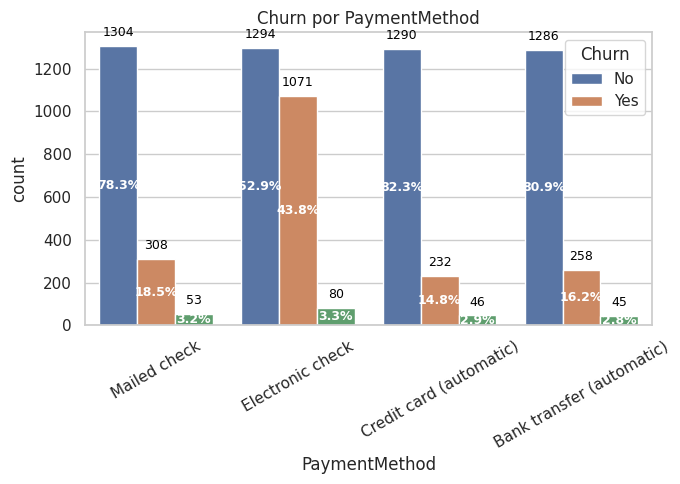

In [33]:
# Asegura estilo limpio
sns.set(style='whitegrid')

# Lista de columnas categ√≥ricas que quieres analizar
cat_cols = ['PaymentMethod']  # Puedes agregar m√°s variables aqu√≠

for col in cat_cols:
    plt.figure(figsize=(7, 5))
    ax = sns.countplot(data=data, x=col, hue='Churn')

    plt.title(f'Churn por {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()

    # Total por categor√≠a (sin hue)
    total_group = data.groupby(col).size().to_dict()

    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height == 0:
                continue

            x = bar.get_x() + bar.get_width() / 2
            label_name = bar.get_label()
            label_idx = round(x)
            base_label = ax.get_xticklabels()[label_idx].get_text()
            total = total_group.get(base_label, height)
            percent = (height / total) * 100

            # Porcentaje dentro de la barra
            ax.annotate(f'{percent:.1f}%',
                        xy=(x, height / 2),
                        ha='center', va='center',
                        color='white', fontsize=9, weight='bold')

            # Conteo absoluto fuera de la barra (arriba)
            ax.annotate(f'{int(height)}',
                        xy=(x, height),
                        xytext=(0, 5),
                        textcoords='offset points',
                        ha='center', va='bottom',
                        color='black', fontsize=9)

    plt.show()

**Observaciones Clave:**

- **Pago autom√°tico por transferencia bancaria (`Bank transfer`)**:
  - Churn: **16%**
  - Permanencia: **81%**

- **Pago autom√°tico con tarjeta de cr√©dito (`Credit card`)**:
  - Churn: **15%**
  - Permanencia: **82%**

- **Pago con cheque electr√≥nico (`Electronic check`)**:
  - Churn: **44%**
  - Permanencia: **53%**

- **Pago con cheque f√≠sico (`Mailed check`)**:
  - Churn: **18%**
  - Permanencia: **78%**


**Conclusi√≥n**

- Fomentar el uso de m√©todos de pago autom√°ticos puede ser una **buena estrategia para reducir el churn**.
- Clientes que usan `electronic check` podr√≠an beneficiarse de:
  - Recordatorios de pago.
  - Educaci√≥n financiera digital.
  - Incentivos para migrar a pagos autom√°ticos (bonos, descuentos, etc.).

#üìÑInforme final

1. **Introducci√≥n**

Telecomx es una compa√±√≠a que brinda servicios de telecomunicaciones y se enfrenta a una alta tasa de cancelaci√≥n de clientes (churn). Este informe tiene como objetivo analizar los factores que influyen en la deserci√≥n de clientes utilizando un enfoque basado en datos. Los resultados permitir√°n tomar decisiones estrat√©gicas enfocadas en la mejora de la retenci√≥n de usuarios.

**2. Descripci√≥n de los Datos **

El conjunto de datos contiene 7267 registros de clientes y 22 variables, divididas en:

Categor√≠as generales:

Identificaci√≥n: customerID

Resultado objetivo: Churn (Yes/No)

Variables categ√≥ricas: gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod

Variables num√©ricas: tenure (meses de permanencia), MonthlyCharges, TotalCharges

3.** An√°lisis Exploratorio de Datos (EDA)**

Distribuci√≥n General del Churn: Aproximadamente un 26% de los clientes ha cancelado el servicio. Se observaron patrones notables en clientes con menor antig√ºedad y contratos mensuales.

**Relaciones relevantes:**

Contract: Los clientes con contratos mensuales tienen mayor probabilidad de cancelar.

tenure: A menor permanencia, mayor tasa de churn.

PaymentMethod: El pago autom√°tico est√° asociado con menor churn.

TechSupport, OnlineSecurity: La ausencia de estos servicios incrementa la cancelaci√≥n.

Mapas de calor de correlaci√≥n revelaron baja correlaci√≥n lineal, pero asociaciones categ√≥ricas claras.

4. **Preparaci√≥n de los Datos**

Conversi√≥n de columnas a tipo category para optimizar la manipulaci√≥n.

Eliminaci√≥n de valores nulos, principalmente en TotalCharges.

5. **Hallazgos Clave**

Corto tiempo de permanencia, contratos mensuales y ausencia de soporte se correlacionan con mayor probabilidad de churn.

Los clientes con servicios combinados y contratos de largo plazo presentan menor tasa de cancelaci√≥n.

6**. Recomendaciones**

Implementar estrategias de fidelizaci√≥n para nuevos clientes (primeros 6 meses).

Promover contratos anuales o bianuales mediante descuentos.

Incentivar m√©todos de pago autom√°tico.

Mejorar comunicaci√≥n y acceso a servicios de soporte t√©cnico.

7.** Conclusiones**

El an√°lisis ha identificado variables clave que influyen en el churn. Los hallazgos permitir√°n desarrollar campa√±as de retenci√≥n m√°s efectivas y mejorar la experiencia del cliente.

8. **Anexos**

Gr√°ficos de barras apiladas por categor√≠a.



**Anexos Graficos**

**Distribuci√≥n MountlyingCharges por Estado de Churn**

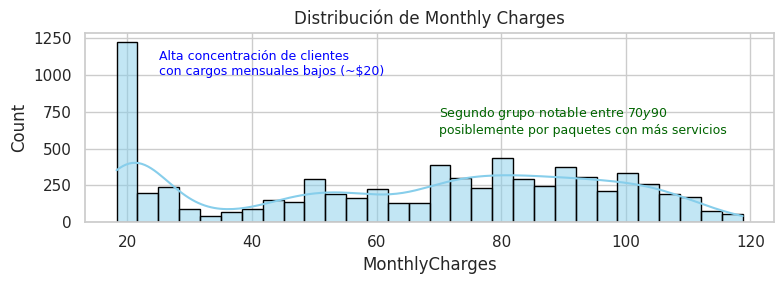

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
sns.histplot(data=data, x='MonthlyCharges', kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuci√≥n de Monthly Charges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')

# Texto explicativo (puedes ajustar ubicaci√≥n con x, y)
plt.text(25, 1000,
         'Alta concentraci√≥n de clientes\ncon cargos mensuales bajos (~$20)',
         fontsize=9, color='blue')

plt.text(70, 600,
         'Segundo grupo notable entre $70 y $90\nposiblemente por paquetes con m√°s servicios',
         fontsize=9, color='darkgreen')

plt.grid(True)
plt.tight_layout()
plt.show()

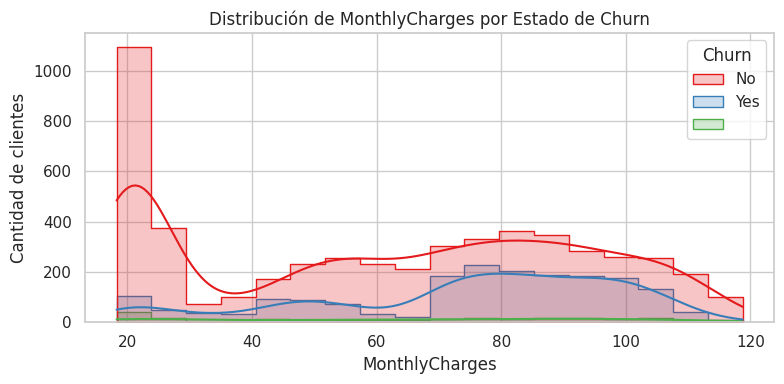

In [40]:
# Estilo del gr√°fico
sns.set(style="whitegrid")

# Crear gr√°fico
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, element='step', stat='count', palette='Set1')
plt.title('Distribuci√≥n de MonthlyCharges por Estado de Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()

**Observaciones Clave:**

. Clientes que NO cancelaron (Churn = No):

La mayor concentraci√≥n est√° en cargos bajos, especialmente cerca de los $20.
Esto sugiere que los clientes con tarifas m√°s econ√≥micas tienden a permanecer m√°s tiempo con la compa√±√≠a.

.Clientes que cancelaron (Churn = Yes):

La distribuci√≥n muestra un pico entre los $70 y $90, indicando que muchos clientes que pagan tarifas medias-altas tienden a cancelar.

La baja presencia en cargos bajos sugiere que los clientes con servicios econ√≥micos son menos propensos al abandono.

**Conclusi√≥n:**

Existe una relaci√≥n evidente entre el nivel de cargos mensuales y la cancelaci√≥n del servicio:
üìà A mayor MonthlyCharges, mayor probabilidad de churn.
Esto puede deberse a una percepci√≥n de bajo valor, problemas con los servicios o insatisfacci√≥n con los planes m√°s costosos.

**Distribuci√≥n de Total Charges**

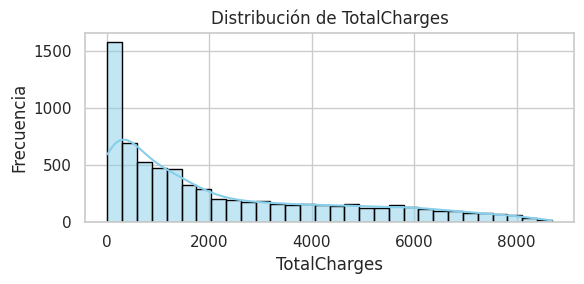

In [46]:
# Lista de columnas num√©ricas a graficar
num_cols = [ 'TotalCharges']

# Crear gr√°ficos
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=data, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Observaciones Clave:**

Distribuci√≥n sesgada a la derecha (positivamente): La mayor√≠a de los clientes tienen cargos totales bajos, especialmente entre 0 y 1000 unidades monetarias.

üîµ A medida que los cargos aumentan, la cantidad de clientes disminuye considerablemente.

üîµ Existen algunos valores extremos (outliers) por encima de los 8000, aunque en muy baja proporci√≥n.

Posibles implicaciones:

Los clientes con menor permanencia en la compa√±√≠a o contratos de corto plazo probablemente tienen cargos bajos.

Los valores altos podr√≠an corresponder a clientes antiguos o con servicios premium, aunque no son mayor√≠a.

Esta variable podr√≠a influir en el churn si se combina con otros factores (como tipo de contrato o m√©todo de pago).

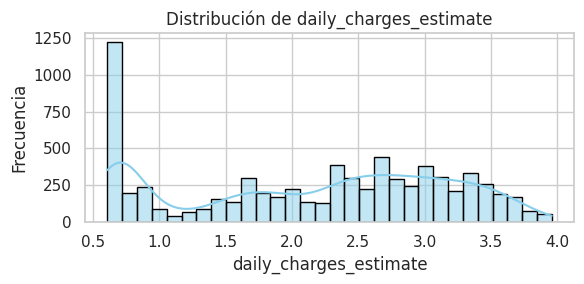

In [48]:
# Lista de columnas num√©ricas a graficar
num_cols = [ 'daily_charges_estimate',]

# Crear gr√°ficos
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=data, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Observaciones Clave: **

**Distribuci√≥n de daily_charges_estimate**

Este gr√°fico muestra la distribuci√≥n de los **cargos diarios estimados** (`daily_charges_estimate`), calculados con base en el valor mensual dividido por los d√≠as de permanencia.

#### Observaciones:

- Se evidencia una **alta concentraci√≥n de clientes** con cargos diarios estimados **cercanos a 0.7**, lo que indica un grupo significativo con **bajo consumo diario**.
- A medida que aumentan los cargos diarios, la frecuencia de clientes disminuye gradualmente.
- Existe una **cola derecha** pronunciada: algunos clientes tienen cargos diarios estimados mayores a **3.5**, pero representan una **minor√≠a**.
- La distribuci√≥n es **asim√©trica positiva (sesgada a la derecha)**, t√≠pica en servicios donde algunos clientes optan por planes con m√∫ltiples servicios o paquetes.

**Conclusi√≥n:**

La mayor√≠a de los clientes mantienen niveles bajos de cargos diarios, lo que podr√≠a representar planes b√°sicos o menor uso del servicio. Este grupo puede ser **sensible al precio**, y por tanto, m√°s propenso al churn si se perciben aumentos o falta de valor.

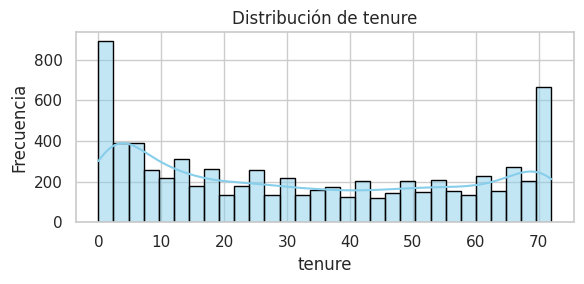

In [51]:
# Lista de columnas num√©ricas a graficar
num_cols = [ 'tenure',]

# Crear gr√°ficos
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=data, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Observaciones Clave:**

Interpretaci√≥n del gr√°fico de distribuci√≥n de tenure (antig√ºedad del cliente)
La variable tenure muestra una distribuci√≥n bimodal con concentraciones destacadas en los extremos:

Hay un gran n√∫mero de clientes nuevos (cercanos a 0 meses de permanencia), lo que sugiere una alta tasa de incorporaci√≥n reciente.

Tambi√©n se observa un grupo considerable de clientes leales con permanencias cercanas a los 70-72 meses.

En cambio, hay una menor frecuencia de clientes con permanencias intermedias (10 a 60 meses), indicando que muchos clientes abandonan o se consolidan r√°pidamente.

üîç Esto podr√≠a indicar que los clientes tienden a tomar decisiones definitivas (cancelar o continuar) en etapas tempranas o mantenerse a largo plazo si superan cierto umbral de tiempo.



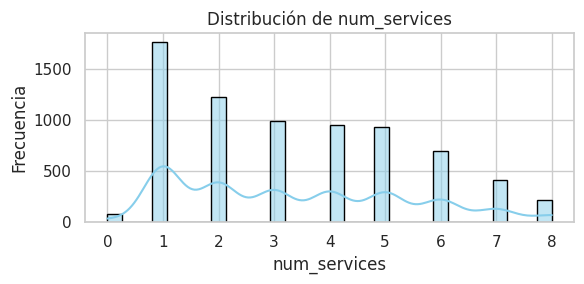

In [53]:
# Lista de columnas num√©ricas a graficar
num_cols = [ 'num_services',]

# Crear gr√°ficos
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=data, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribuci√≥n de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Observaciones Clave:**

Interpretaci√≥n de la distribuci√≥n de num_services (cantidad de servicios activos por cliente)
El gr√°fico muestra la frecuencia de clientes seg√∫n la cantidad de servicios contratados:

La mayor√≠a de los clientes tienen entre 1 y 3 servicios activos, lo que indica que la oferta b√°sica es la m√°s utilizada.

A medida que aumenta el n√∫mero de servicios (4 a 8), la frecuencia disminuye, lo cual sugiere que pocos clientes contratan paquetes completos.

Sin embargo, se observa una distribuci√≥n amplia que revela segmentos diversos de usuarios, desde los que apenas contratan un servicio hasta los que tienen m√∫ltiples productos.

üîç Esta informaci√≥n puede ser √∫til para segmentar a los clientes por nivel de adopci√≥n de servicios y dise√±ar estrategias de retenci√≥n o venta cruzada seg√∫n su nivel de uso.



In [54]:
for col in cat_cols:
    print(f"\nChurn por {col}:")
    print(pd.crosstab(data[col], data['Churn'], normalize='index').round(2))



Churn por PaymentMethod:
Churn                              No   Yes
PaymentMethod                              
Bank transfer (automatic)  0.03  0.81  0.16
Credit card (automatic)    0.03  0.82  0.15
Electronic check           0.03  0.53  0.44
Mailed check               0.03  0.78  0.18


Relaciones

In [60]:
import pandas as pd

# Lista de columnas categ√≥ricas (excluyendo customerID)
cat_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# Tablas cruzadas de proporci√≥n de Churn por categor√≠a
for col in cat_cols:
    print(f"\nüìä Churn por '{col}':")
    tabla = pd.crosstab(data[col], data['Churn'], normalize='index').round(2)
    print(tabla)


üìä Churn por 'gender':
Churn           No   Yes
gender                  
Female  0.03  0.71  0.26
Male    0.03  0.71  0.25

üìä Churn por 'Partner':
Churn            No   Yes
Partner                  
No       0.03  0.65  0.32
Yes      0.03  0.78  0.19

üìä Churn por 'Dependents':
Churn               No   Yes
Dependents                  
No          0.03  0.67  0.30
Yes         0.03  0.82  0.15

üìä Churn por 'PhoneService':
Churn                 No   Yes
PhoneService                  
No            0.04  0.72  0.24
Yes           0.03  0.71  0.26

üìä Churn por 'MultipleLines':
Churn                     No   Yes
MultipleLines                     
No                0.03  0.73  0.24
No phone service  0.04  0.72  0.24
Yes               0.03  0.69  0.28

üìä Churn por 'InternetService':
Churn                    No   Yes
InternetService                  
DSL              0.03  0.79  0.18
Fiber optic      0.03  0.56  0.41
No               0.03  0.89  0.07

üìä Churn por 'OnlineSecur

**Agrupaciones combinadas relevantes**

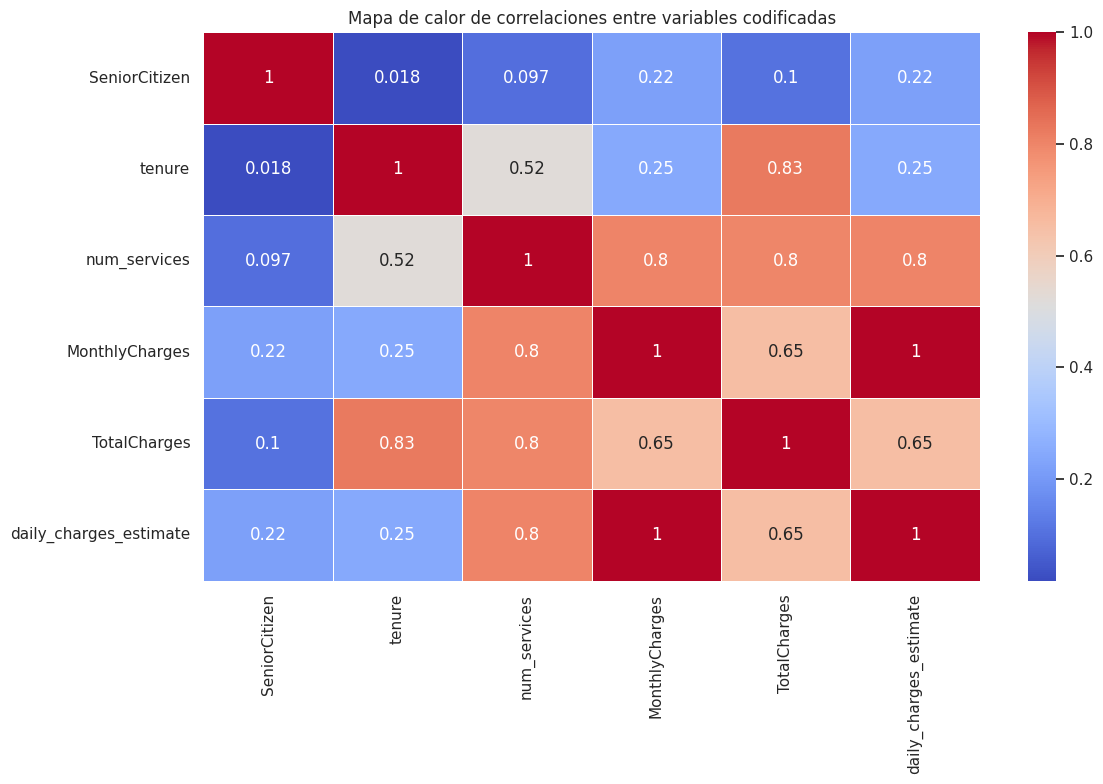

In [57]:


# 4. Crear un diagrama de calor para ver correlaciones entre variables num√©ricas
plt.figure(figsize=(12, 8))

# Filtrar columnas num√©ricas
numeric_data = data.select_dtypes(include=['number'])

# Crear mapa de calor de correlaciones
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlaciones entre variables codificadas')
plt.tight_layout()
plt.show()


Tabla de Correlaciones entre Variables Num√©ricas

| Variable 1           | Variable 2             | Correlaci√≥n | Interpretaci√≥n                                                                 |
|----------------------|------------------------|-------------|--------------------------------------------------------------------------------|
| MonthlyCharges       | TotalCharges           | 0.65        | A mayor cargo mensual, mayor el total acumulado.                             |
| MonthlyCharges       | num_services           | 0.80        | Cuantos m√°s servicios activos, mayor el cargo mensual.                       |
| MonthlyCharges       | daily_charges_estimate | 1.00        | Estimaci√≥n diaria es derivada del cargo mensual (correlaci√≥n perfecta).      |
| TotalCharges         | tenure                 | 0.83        | Clientes con m√°s tiempo generan mayores cargos acumulados.                   |
| num_services         | TotalCharges           | 0.80        | M√°s servicios implican mayor facturaci√≥n acumulada.                          |
| tenure               | num_services           | 0.52        | Los clientes m√°s antiguos tienden a tener m√°s servicios.                     |
| SeniorCitizen        | Todas las variables    | ‚â§ 0.22      | Ser adulto mayor no muestra fuerte relaci√≥n con las otras variables.         |

**Nota:** Una correlaci√≥n cercana a 1 indica una relaci√≥n lineal fuerte y positiva; cerca de 0 implica baja o nula relaci√≥n lineal.

**Observacions Clave:**

Interpretaci√≥n del Mapa de Calor de Correlaciones (Variables Num√©ricas)
El gr√°fico muestra las correlaciones entre variables num√©ricas del conjunto de datos de clientes de Telecomx. A continuaci√≥n se detallan los hallazgos m√°s relevantes:

Alta correlaci√≥n entre MonthlyCharges, num_services, daily_charges_estimate y TotalCharges:

Estas variables est√°n altamente relacionadas entre s√≠ (coeficientes entre 0.65 y 1.0), lo cual es esperado, ya que el total de cargos y estimaciones diarias dependen directamente del monto mensual y la cantidad de servicios contratados.

tenure y TotalCharges (correlaci√≥n ‚âà 0.83):

Existe una fuerte correlaci√≥n positiva entre el tiempo que un cliente lleva en la empresa y los cargos totales acumulados, lo cual sugiere que los clientes m√°s antiguos tienden a generar mayores ingresos.

SeniorCitizen muestra baja correlaci√≥n con el resto de variables:

Esta variable apenas se relaciona con las otras, lo cual indica que ser adulto mayor no influye directamente en el monto cobrado o el n√∫mero de servicios contratados.

num_services tiene una correlaci√≥n media con tenure (‚âà 0.52):

Es posible que los clientes m√°s antiguos hayan agregado m√°s servicios con el tiempo.

**Conclusi√≥n:**

*Mayor retenci√≥n se asocia a: *

Contratos largos (dos a√±os).

Clientes que pagan m√°s en total (historial largo).

Clientes con servicios de seguridad, soporte y respaldo.

Mayor cancelaci√≥n se asocia a:

Planes caros mes a mes.

Uso de fibra √≥ptica (posiblemente m√°s exigente).

Servicios modernos o automatizados sin contacto f√≠sico (PaperlessBilling).